# Dhairya Daga
## Data Science and Business Analytics Intern @ The Sparks Foundation

### Task 5 : Exploratory Data Analysis (Indian Premier League)

**IPL** (Indian Premier League) is a men's T20 cricket League that is held in India anually. The **BCCI** (Board of Control for Cricket in Ondia) founded the league in 2007. The playes of different nations takes part in it and the competition is uaually held in summers between March and May.  
**Note**: Tha data on which I am doing EDA is till season 2019. So all the results and inferences are upto 2019 season only. 
    

![Indian_Premier_League_Official_Logo.svg%20%281%29%20(1).png](attachment:Indian_Premier_League_Official_Logo.svg%20%281%29%20(1).png)
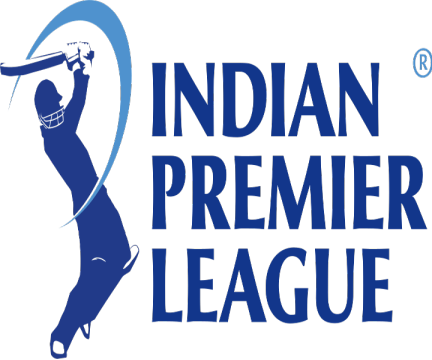

In [2]:
# loading libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("matches.csv")
ipl = df.copy()

In [229]:
ipl.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


Our data has 18 columns namely **id, season, city, date, team, team2, toss_winner, toss_decision, result, dl_applied, winner, win_by_runs, win_by_wickets, player_of_match, venue, umpire1, umpire2, umpire3**

In [235]:
ipl.columns

[Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
        'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
        'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
        'umpire3'],
       dtype='object')]

In [239]:
ipl.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [7]:
# Dropping umpire 3 as it has too many nyll values
ipl.drop('umpire3', axis = 1, inplace = True)

In [241]:
ipl.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [242]:
# total number of matches played in IPL
total_matches = ipl.id.count()
total_matches

756

In [26]:
season_wise = ipl.groupby('season').id.count()
season_wise

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
Name: id, dtype: int64

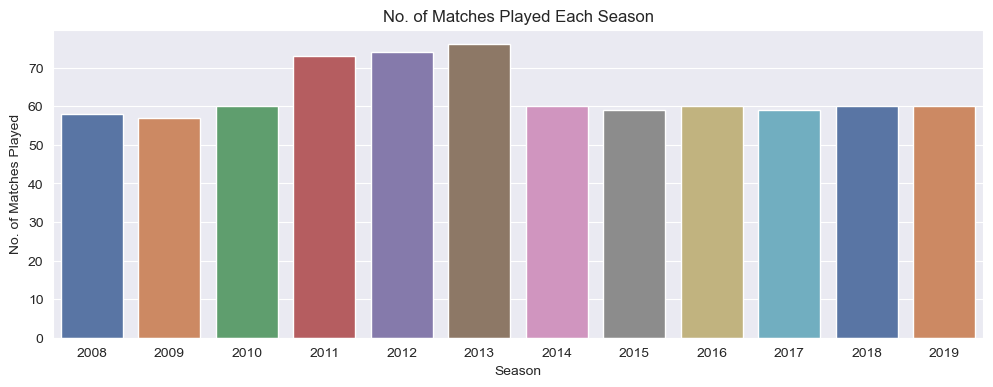

In [38]:
sns.set_style('darkgrid')
plt.figure(figsize =(12,4))
sns.countplot(x = 'season', data = ipl, palette = 'deep')
plt.xlabel('Season')
plt.ylabel('No. of Matches Played')
plt.title('No. of Matches Played Each Season')
plt.show()

In [41]:
season_wise_wins = ipl.groupby('season')['winner'].value_counts()
season_wise_wins

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

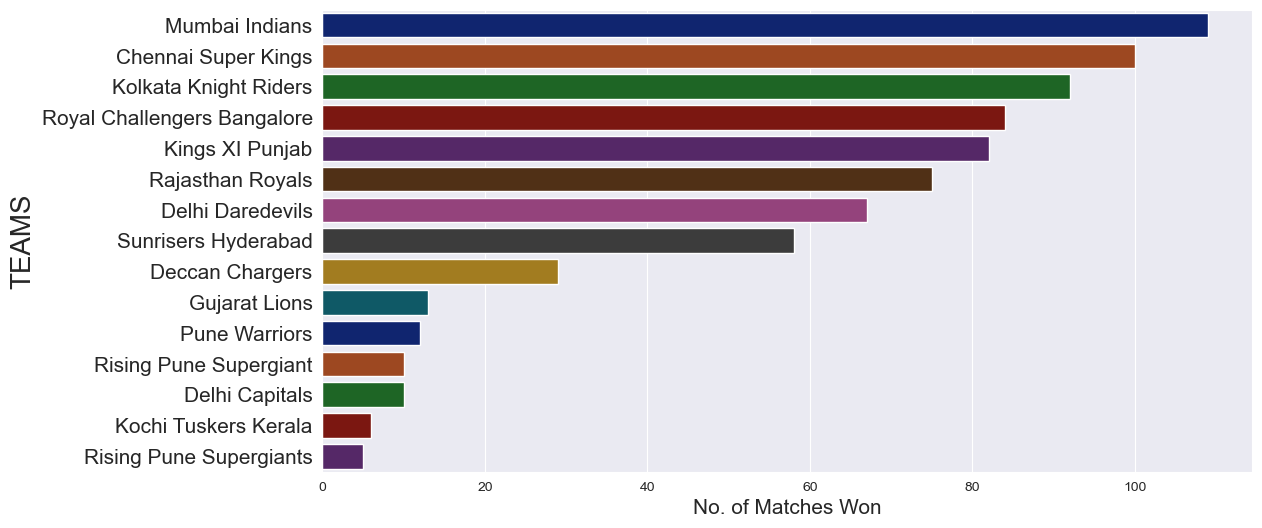

In [61]:
sns.set_style('darkgrid')
plt.figure(figsize =(12,6))
d = df.winner.value_counts()
sns.barplot(x = d, y = d.index, palette = 'dark')
plt.yticks(fontsize = 15)
plt.xlabel('No. of Matches Won', fontsize = 15)
plt.ylabel('TEAMS', fontsize = 20)
plt.show()

In [70]:
print('No. of matches where team winning the toss wins the match are',ipl.loc[ipl.toss_winner == ipl.winner].id.count())
print('No. of matches where team winning the toss loses the match are',ipl.loc[ipl.toss_winner != ipl.winner].id.count())

No. of matches where team winning the toss wins the match are 393
No. of matches where team winning the toss loses the match are 363


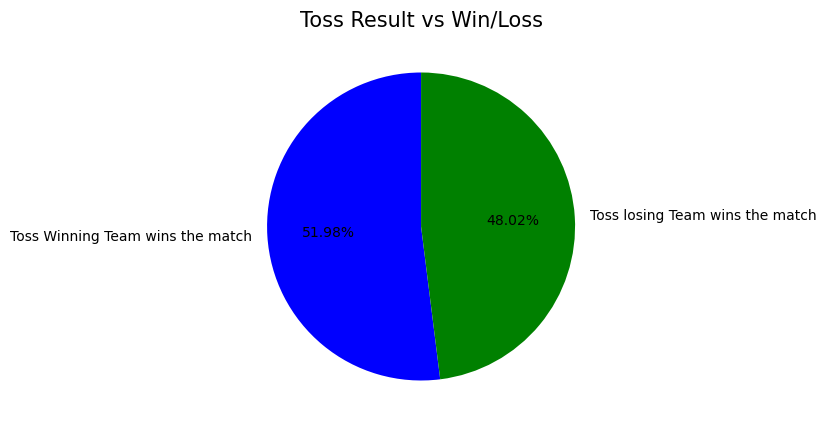

In [4]:
a = [393,363]
labels = ('Toss Winning Team wins the match', 'Toss losing Team wins the match')
colors = ['blue', 'green']
fig = plt.figure(figsize =(5, 5))
plt.pie(a, labels = labels, startangle = 90, autopct = "%.2f%%", colors = colors)
plt.title('Toss Result vs Win/Loss', fontsize = 15)
plt.show()

Let us look at the matches which were tied or had no result.  
These are the matches in which both win_by_runs and win_by_wickets both are 0.

In [90]:
ipl[((ipl.win_by_runs == 0) & (ipl.win_by_wickets == 0))].id.count()

13

In [98]:
ipl[ipl.result == 'tie']

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
33,34,2017,Rajkot,2017-04-29,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,tie,0,Mumbai Indians,0,0,KH Pandya,Saurashtra Cricket Association Stadium,AK Chaudhary,CB Gaffaney
125,126,2009,Cape Town,2009-04-23,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,tie,0,Rajasthan Royals,0,0,YK Pathan,Newlands,MR Benson,M Erasmus
189,190,2010,Chennai,2010-03-21,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,tie,0,Kings XI Punjab,0,0,J Theron,"MA Chidambaram Stadium, Chepauk",K Hariharan,DJ Harper
387,388,2013,Hyderabad,2013-04-07,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,bat,tie,0,Sunrisers Hyderabad,0,0,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,S Ravi
400,401,2013,Bangalore,2013-04-16,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,tie,0,Royal Challengers Bangalore,0,0,V Kohli,M Chinnaswamy Stadium,M Erasmus,VA Kulkarni
475,476,2014,Abu Dhabi,2014-04-29,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,tie,0,Rajasthan Royals,0,0,JP Faulkner,Sheikh Zayed Stadium,Aleem Dar,AK Chaudhary
535,536,2015,Ahmedabad,2015-04-21,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,tie,0,Kings XI Punjab,0,0,SE Marsh,"Sardar Patel Stadium, Motera",M Erasmus,S Ravi
705,11146,2019,Delhi,30/03/19,Kolkata Knight Riders,Delhi Capitals,Delhi Capitals,field,tie,0,Delhi Capitals,0,0,P Shaw,Feroz Shah Kotla Ground,Anil Dandekar,Nitin Menon
746,11342,2019,Mumbai,02/05/19,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,tie,0,Mumbai Indians,0,0,JJ Bumrah,Wankhede Stadium,S Ravi,O Nandan


In [97]:
ipl[ipl.result == 'no result']

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe


In [10]:
'''removing tied and no result matches as in further analysis like winning team bowled first or batted first these matches have 
nothing to do as in case of a tied match it is super over which decides the result. '''

new_df = df.copy()
new_df = df[~((df.result == 'tie') | (df.result == 'no result'))]
new_df['win_mode'] = np.where(new_df.win_by_runs >0, 'Bat first', 'Bowl first')

# Adding new column win_mode

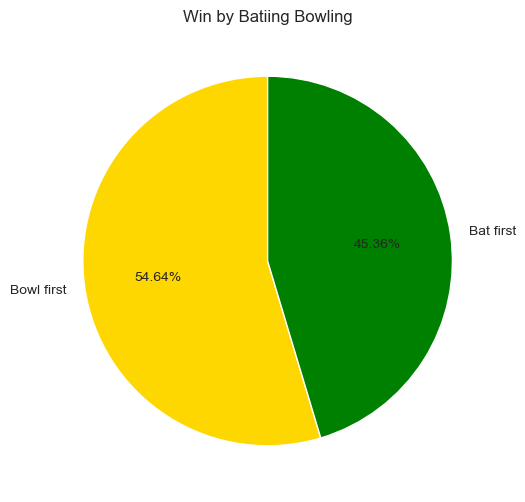

In [71]:
a = new_df.win_mode.value_counts()
labels = a.index
colors = ['gold', 'green']
plt.figure(figsize =(10,6))
plt.pie(a, labels = labels, startangle = 90, autopct = "%.2f%%", colors = colors)
plt.title('Win by Batiing Bowling')
plt.show()

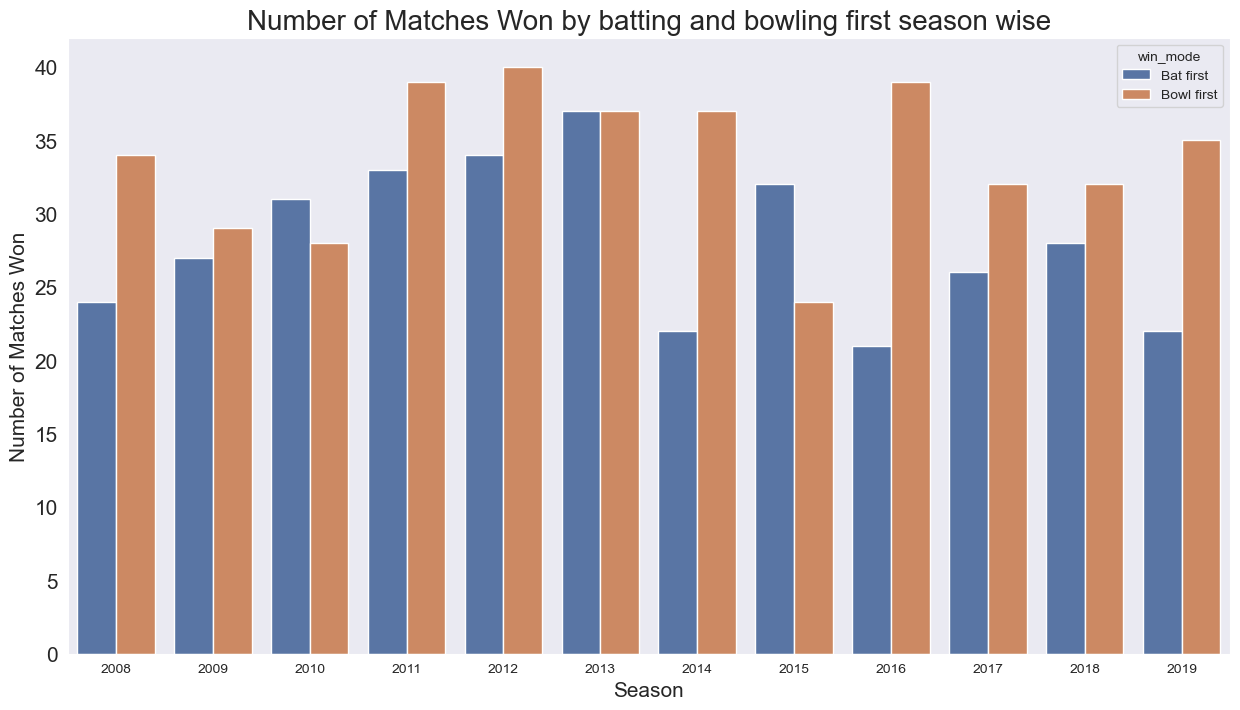

In [34]:
sns.set_style('dark')
plt.figure(figsize =(15,8))
sns.countplot(x = 'season', hue = 'win_mode', data = new_df, palette = 'deep')
plt.yticks(fontsize = 15)
plt.xlabel('Season', fontsize = 15)
plt.ylabel('Number of Matches Won', fontsize = 15)
plt.title('Number of Matches Won by batting and bowling first season wise', fontsize = 20)
plt.show()

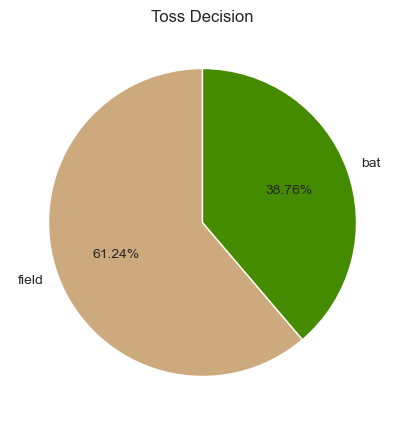

In [76]:
toss  = ipl.toss_decision.value_counts()
labels = toss.index
colors = ['#CDAA7D', '#458B00']
fig = plt.figure(figsize =(5, 5))
plt.pie(toss, labels = labels, startangle = 90, autopct = "%.2f%%", colors = colors)
plt.title('Toss Decision')
plt.show()

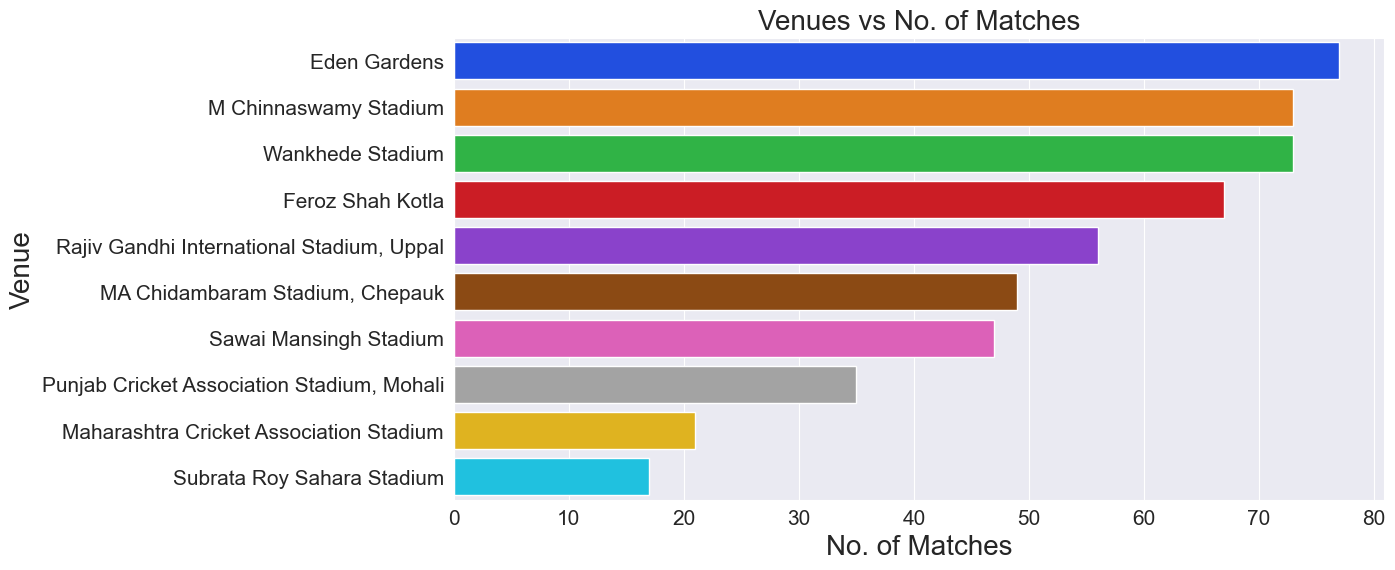

In [75]:
sns.set_style('darkgrid')
plt.figure(figsize =(12,6))
ven = ipl.venue.value_counts()[0:10]
sns.barplot(x = ven, y = ven.index, palette = 'bright')
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.xlabel('No. of Matches', fontsize = 20)
plt.ylabel('Venue', fontsize = 20)
plt.title('Venues vs No. of Matches', fontsize = 20)
plt.show()

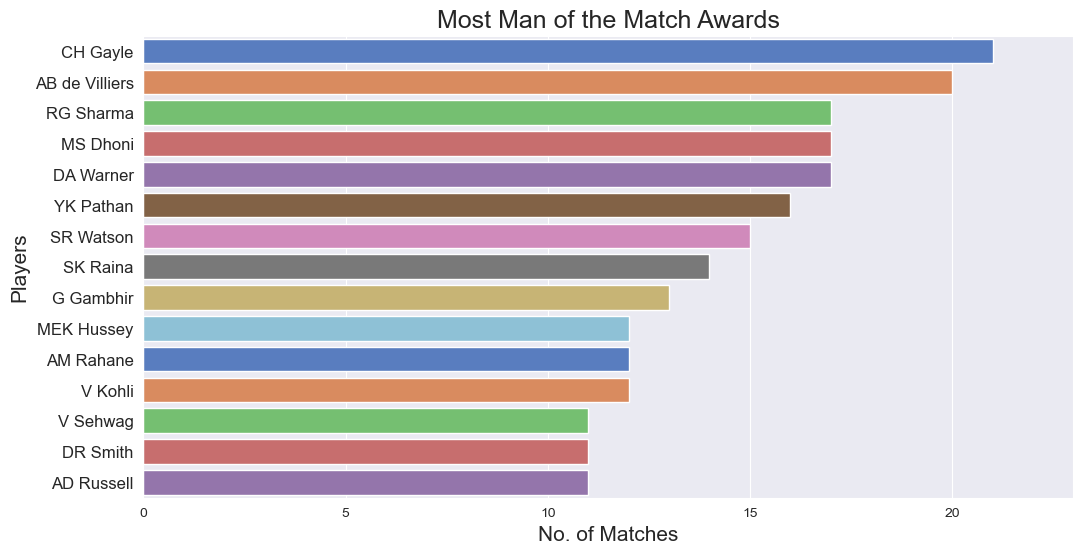

In [74]:
sns.set_style('darkgrid')
plt.figure(figsize =(12,6))
mvp = ipl.player_of_match.value_counts()[0:15]
sns.barplot(x = mvp, y = mvp.index, palette = 'muted')
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 10)
plt.xlim(0,23)
plt.xlabel('No. of Matches', fontsize = 15)
plt.ylabel('Players', fontsize = 15)
plt.title('Most Man of the Match Awards', fontsize = 18)
plt.show()

Let's look at the matches where **margin of winning** was **100 runs or more** (for bowling team) or **10 wickets** (for batting team)

In [121]:
win_by_margin = ipl[ipl.win_by_runs >= 100].sort_values('season')
print('Number of Matches in which margin of win is greater than or equal to 100 runs are',win_by_margin.id.count()) 
win_by_margin

Number of Matches in which margin of win is greater than or equal to 100 runs are 9


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
59,60,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen
114,115,2008,Mumbai,2008-05-30,Rajasthan Royals,Delhi Daredevils,Delhi Daredevils,field,normal,0,Rajasthan Royals,105,0,SR Watson,Wankhede Stadium,BF Bowden,RE Koertzen
295,296,2011,Dharamsala,2011-05-17,Kings XI Punjab,Royal Challengers Bangalore,Kings XI Punjab,bat,normal,0,Kings XI Punjab,111,0,AC Gilchrist,Himachal Pradesh Cricket Association Stadium,Asad Rauf,AM Saheba
410,411,2013,Bangalore,2013-04-23,Royal Challengers Bangalore,Pune Warriors,Pune Warriors,field,normal,0,Royal Challengers Bangalore,130,0,CH Gayle,M Chinnaswamy Stadium,Aleem Dar,C Shamshuddin
556,557,2015,Bangalore,2015-05-06,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Royal Challengers Bangalore,138,0,CH Gayle,M Chinnaswamy Stadium,RK Illingworth,VA Kulkarni
619,620,2016,Bangalore,2016-05-14,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,field,normal,0,Royal Challengers Bangalore,144,0,AB de Villiers,M Chinnaswamy Stadium,AY Dandekar,VK Sharma
43,44,2017,Delhi,2017-05-06,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan
676,7934,2018,Kolkata,09/05/18,Mumbai Indians,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Mumbai Indians,102,0,Ishan Kishan,Eden Gardens,Anil Chaudhary,K Ananthapadmanabhan
706,11147,2019,Hyderabad,31/03/19,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,118,0,J Bairstow,Rajiv Gandhi Intl. Cricket Stadium,S Ravi,KN Anantapadmanabhan


In [92]:
win_by_margin.winner.value_counts()

Royal Challengers Bangalore    3
Mumbai Indians                 2
Kolkata Knight Riders          1
Rajasthan Royals               1
Kings XI Punjab                1
Sunrisers Hyderabad            1
Name: winner, dtype: int64

In [119]:
win_by_wickets = ipl[ipl.win_by_wickets == 10].sort_values('season')
print('Number of Matches in which the margin of winning is equal to 10 wickets i.e the team chasing the total chased it without losing a single wicket are' ,win_by_wickets.id.count())
win_by_wickets

Number of Matches in which the margin of winning is equal to 10 wickets i.e the team chasing the total chased it without losing a single wicket are 11


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
71,72,2008,Mumbai,2008-04-27,Mumbai Indians,Deccan Chargers,Deccan Chargers,field,normal,0,Deccan Chargers,0,10,AC Gilchrist,Dr DY Patil Sports Academy,Asad Rauf,SL Shastri
119,120,2009,Cape Town,2009-04-19,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,field,normal,1,Delhi Daredevils,0,10,DL Vettori,Newlands,MR Benson,SD Ranade
183,184,2010,Bangalore,2010-03-18,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,JH Kallis,M Chinnaswamy Stadium,K Hariharan,DJ Harper
298,299,2011,Mumbai,2011-05-20,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,normal,0,Rajasthan Royals,0,10,SR Watson,Wankhede Stadium,RE Koertzen,PR Reiffel
376,377,2012,Jaipur,2012-05-20,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Mumbai Indians,0,10,DR Smith,Sawai Mansingh Stadium,HDPK Dharmasena,C Shamshuddin
390,391,2013,Chandigarh,2013-04-10,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,10,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,C Shamshuddin
542,543,2015,Delhi,2015-04-26,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,VR Aaron,Feroz Shah Kotla,M Erasmus,S Ravi
590,591,2016,Rajkot,2016-04-21,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,10,B Kumar,Saurashtra Cricket Association Stadium,K Bharatan,HDPK Dharmasena
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
34,35,2017,Chandigarh,2017-04-30,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,10,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",YC Barde,CK Nandan


In [96]:
win_by_wickets.winner.value_counts()

Royal Challengers Bangalore    3
Deccan Chargers                1
Delhi Daredevils               1
Rajasthan Royals               1
Mumbai Indians                 1
Chennai Super Kings            1
Sunrisers Hyderabad            1
Kolkata Knight Riders          1
Kings XI Punjab                1
Name: winner, dtype: int64

Now let's look at the **final mtaches** of each season and their winner.

In [123]:
finals = df.drop_duplicates(subset = ['season'], keep = 'last' )
finals[['season', 'winner']].reset_index(drop = True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


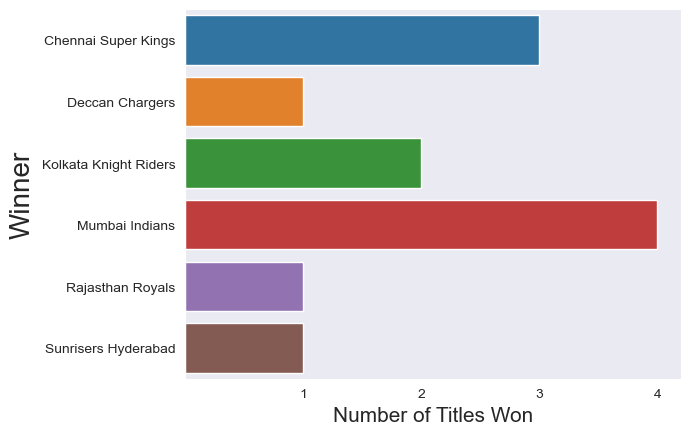

In [131]:
sns.set_style('dark')
F = finals.groupby('winner').size()
sns.barplot(x = F, y = F.index, data = df)
plt.xticks([1,2,3,4])
plt.ylabel('Winner', fontsize = 20)
plt.xlabel('Number of Titles Won', fontsize = 15)
plt.show()

In [134]:
toss = finals[['toss_winner','toss_decision','winner','win_by_wickets', 'win_by_runs']].reset_index(drop=True)
toss

,toss_winner,toss_decision,winner,win_by_wickets,win_by_runs
0,Mumbai Indians,bat,Mumbai Indians,0,1
1,Rajasthan Royals,field,Rajasthan Royals,3,0
2,Royal Challengers Bangalore,field,Deccan Chargers,0,6
3,Chennai Super Kings,bat,Chennai Super Kings,0,22
4,Chennai Super Kings,bat,Chennai Super Kings,0,58
5,Chennai Super Kings,bat,Kolkata Knight Riders,5,0
6,Mumbai Indians,bat,Mumbai Indians,0,23
7,Kolkata Knight Riders,field,Kolkata Knight Riders,3,0
8,Chennai Super Kings,field,Mumbai Indians,0,41
9,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,0,8


In [135]:
finals[((finals.result == 'tie') & (finals.result == 'no result'))].id.count()

0

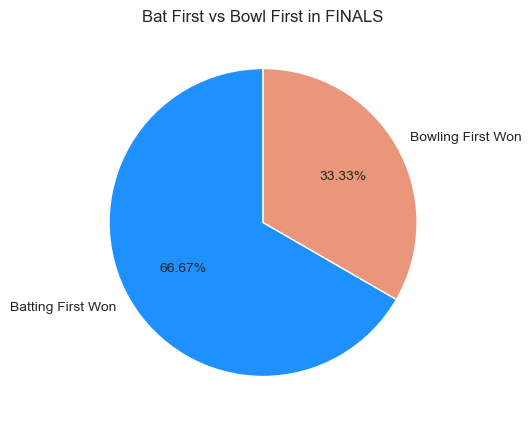

In [142]:
batting_first_final = gh[gh.win_by_runs > 0].winner.count()
bowling_first_final = gh[gh.win_by_runs == 0].winner.count()
A = [batting_first_final,bowling_first_final ]
labels = ['Batting First Won', 'Bowling First Won']
colors = ['#1E90FF', '#E9967A']
fig = plt.figure(figsize =(5, 5))
plt.pie(A, labels = labels, startangle = 90, autopct = "%.2f%%", colors = colors)
plt.title('Bat First vs Bowl First in FINALS')
plt.show()

In [143]:
finals[['winner', 'player_of_match']].reset_index(drop = True)

,winner,player_of_match
0,Mumbai Indians,KH Pandya
1,Rajasthan Royals,YK Pathan
2,Deccan Chargers,A Kumble
3,Chennai Super Kings,SK Raina
4,Chennai Super Kings,M Vijay
5,Kolkata Knight Riders,MS Bisla
6,Mumbai Indians,KA Pollard
7,Kolkata Knight Riders,MK Pandey
8,Mumbai Indians,RG Sharma
9,Sunrisers Hyderabad,BCJ Cutting


In [225]:
data = pd.read_csv('deliveries.csv')
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


Through the new dataset we will analyse fours and sixes hit by each teams. Also top 10 fours and sixes hitting players and top 10 batsman (run wise) and top 10 bowlers (wickets wise) and also the number of type of dismissals of each type.

In [163]:
fours = data[data.batsman_runs == 4 ]
fours.groupby('batting_team')['batsman_runs'].agg([('fours','count'), ('Total Runs by Fours','sum')]).sort_values(by = 'fours', ascending = False)

,fours,Total Runs by Fours
batting_team,,
Mumbai Indians,2588,10352
Kings XI Punjab,2458,9832
Kolkata Knight Riders,2434,9736
Royal Challengers Bangalore,2360,9440
Chennai Super Kings,2193,8772
Delhi Daredevils,2158,8632
Rajasthan Royals,2035,8140
Sunrisers Hyderabad,1444,5776
Deccan Chargers,957,3828


In [165]:
sixes = data[data.batsman_runs == 6 ]
sixes.groupby('batting_team')['batsman_runs'].agg([('sixes','count'), ('Total Runs by sixes','sum')]).sort_values(by = 'sixes', ascending = False)

,sixes,Total Runs by sixes
batting_team,,
Royal Challengers Bangalore,1132,6792
Mumbai Indians,1096,6576
Kings XI Punjab,976,5856
Chennai Super Kings,973,5838
Kolkata Knight Riders,930,5580
Delhi Daredevils,801,4806
Rajasthan Royals,681,4086
Sunrisers Hyderabad,533,3198
Deccan Chargers,400,2400


In [185]:
fours.groupby('batsman')['batsman_runs'].agg([('fours','count')]).sort_values(by = 'fours', ascending = False)[0:10]

,fours
batsman,
S Dhawan,526
SK Raina,495
G Gambhir,492
V Kohli,482
DA Warner,459
RV Uthappa,436
RG Sharma,431
AM Rahane,405
CH Gayle,376


In [183]:
sixes.groupby('batsman')['batsman_runs'].agg([('sixes','count')]).sort_values(by = 'sixes', ascending = False)[0:10]

,sixes
batsman,
CH Gayle,327
AB de Villiers,214
MS Dhoni,207
SK Raina,195
RG Sharma,194
V Kohli,191
DA Warner,181
SR Watson,177
KA Pollard,175


In [221]:
data.groupby('batsman')['batsman_runs'].agg([('Total Runs', 'sum')]).sort_values(by = 'Total Runs', ascending = False)[0:10]

,Total Runs
batsman,
V Kohli,5434
SK Raina,5415
RG Sharma,4914
DA Warner,4741
S Dhawan,4632
CH Gayle,4560
MS Dhoni,4477
RV Uthappa,4446
AB de Villiers,4428


In [218]:
wickets.groupby('bowler')['dismissal_kind'].agg([('Total Wickets Taken', 'count')]).sort_values(by = 'Total Wickets Taken',ascending = False)[0:10]

,Total Wickets Taken
bowler,
SL Malinga,170
A Mishra,156
Harbhajan Singh,150
PP Chawla,149
DJ Bravo,147
B Kumar,133
R Ashwin,125
SP Narine,122
UT Yadav,119


caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64 



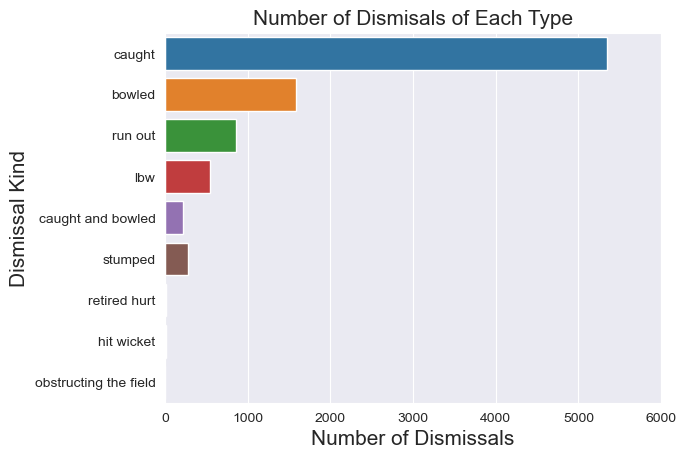

In [224]:
print(data.dismissal_kind.value_counts(), '\n')
sns.set_style('darkgrid')
sns.countplot(y = data.dismissal_kind)
plt.xlim(0,6000)
plt.ylabel('Dismissal Kind', fontsize = 15)
plt.xlabel('Number of Dismissals',fontsize = 15)
plt.title('Number of Dismisals of Each Type', fontsize = 15)
plt.show()

## Results :  

1. **A total of 756 are played in IPL and the most number of matches were played in season 2011, 2012 and 2013.    ]. 
   There are only 9 isntances of tie matches and only 4 matches have no result out of 756.** 
2. **Teams bowling first in IPL has an advantage over teams bowling second i.e teams prefer chasing down totals.It can also be        seen in toss decision as 61.24% of times teams winning the toss prefer batting.**
3. **It is interesting to note that in final matches teams batting first has more advantage i.e In Finals Chasiing totals is not      easy.** 
4. **MI, CSK,KKR and RCB have won most number of matches in IPL.**
5. **MI and CSK are the most successful franchises of IPL winning the title 4 and 3 times respectively.**
6. **Eden Gardens, Chinnaswamy, Wankhede, Feroz Shah Kotla and Rajiv Gandhi Internatuonal Stadium are the top 5 venues that has      hosted most number of matches of IPL.**
7. **Mumbai Indians have hit most number of fours and Royal Challengers have hit most sixes on the IPL.**
8. **Player wise Shikhar Dhawan has hit most number of fours and CH Gayle has hgit most number of sixes.**
9. **Virat Kohli is the highest run getter and SL Malinga is the highest wicket taker.**
10. **CH Gayle, AB de Villers, RG Sharma, MS Dhoni, DA Warner are the players having most Man of Match awards.**
11. **There are only 9 isntances of tie matches and only 4 matches have no result out of 756.**
12. **RCB is the only team to win a mactch by more than 100 runs or by 10 wickets each 3 times.**
13. **It is intersting to note that RCB have not won any IPL title yet(season 2019) though they are one of the successfull franchises in terms of wins and also have most number of sixes.**